In [1]:
%pip install -q sympy numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sympy
import numpy as np

In [3]:
def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = sympy.symbols('t', real=True)
    return (sympy.integrate(f*sympy.conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sympy.sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

def approx(f, tau, n):
    t = sympy.symbols('t', real=True)
    w0 = 2*sympy.pi/tau
    k = sympy.symbols('k', real=True, integer=True)
    psi_k = sympy.exp(-sympy.I*k*w0*t)
    ak = L2_coefficient(f, psi_k, 2*sympy.pi)
    approx = 0
    for k_i in range(-n, n+1):
        approx += (ak*psi_k).subs(k, k_i)

    e = (f - approx).simplify()

    sympy.plot(f, approx, (t, 0, tau))
    sympy.plot(e, (t, 0, tau), label='error', legend=True)
    print(n, ': error using integration', sympy.N(L2_norm(e, tau)))

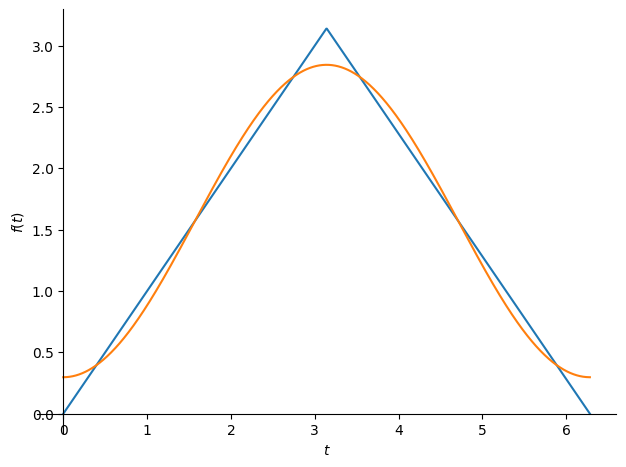

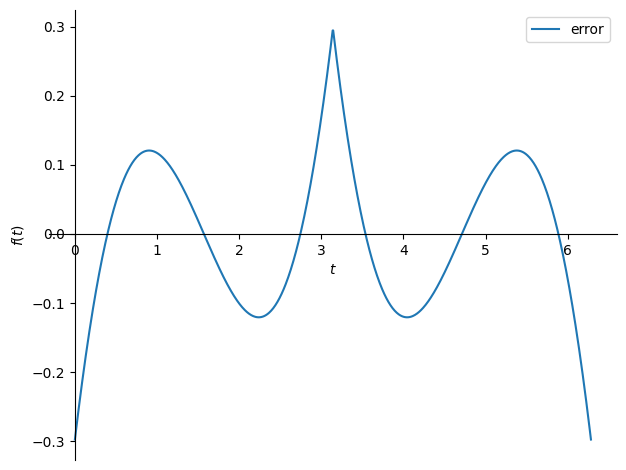

2 : error using integration 0.109075956495513


In [4]:
tau = 2*sympy.pi
t = sympy.symbols('t', real=True)
f = sympy.Piecewise(
    (t, t < sympy.pi),
    (2*sympy.pi - t, t >= sympy.pi)
)
approx(f, tau, 2)

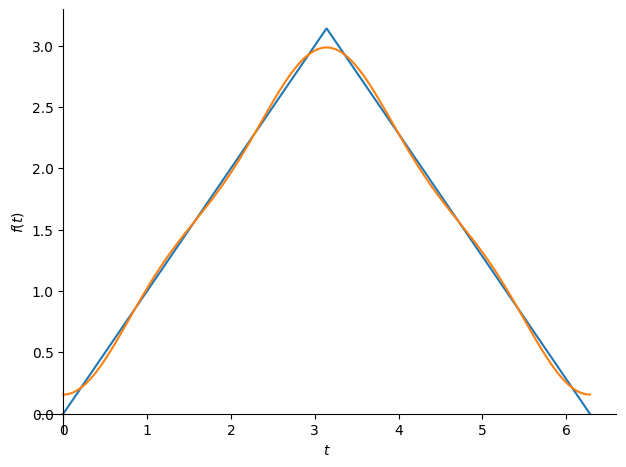

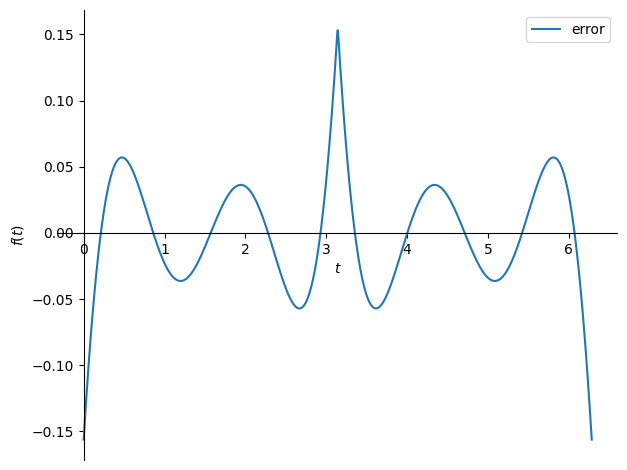

3 : error using integration 0.0434802691139003


In [5]:
tau = 2*sympy.pi
t = sympy.symbols('t', real=True)
f = sympy.Piecewise(
    (t, t < sympy.pi),
    (2*sympy.pi - t, t >= sympy.pi)
)
approx(f, tau, 3)

In [6]:
f_norm_sq = np.pi**2/3
a0 = np.pi/2

def calc_error(n):
    pn_norm_sq = 0
    for k in range(-n, n+1):
        if k == 0:
            ak = a0
        elif k %2 == 1:
            ak = -2/(np.pi*k**2)
        else:
            ak = 0
        pn_norm_sq += np.abs(ak)**2
    error_norm = np.sqrt(f_norm_sq - pn_norm_sq)
    print('n = ', n, ', error', error_norm)

calc_error(2)
calc_error(10)

n =  2 , error 0.1090759564955133
n =  10 , error 0.011510102164236985
